## Processing Data and Creating Export Objects

In [0]:
# Install Packages


# Import Packages
import os
from pathlib import Path
import shutil
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [149]:
# Mount User's Drive
# Copy and paste the passkey from your Google account
# You should use the same account that is operating the Colab file
# Ignore if you aren't accessing this file in Google Colab

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [151]:
parent_dir_name = 'GxE with GEE'

for dirpath, subdirs, files in os.walk('/content'):
  if parent_dir_name in subdirs:
    parent_path = dirpath + "/" + parent_dir_name

parent_path

'/content/drive/My Drive/Research/GxE with GEE'

In [152]:
# Set Data Path
## Change the destination to your Drive directory containing the folder 'raw_data.zip'
data_path_end = '/Colab Workspace/Data'
os.chdir(parent_path + data_path_end)

# Print the current working directory
os.getcwd()

'/content/drive/My Drive/Research/GxE with GEE/Colab Workspace/Data'

In [0]:
# os.chdir('C:/Users/theaa/Downloads')

## Import Aggregated Data from 1_Import

In [0]:
data = pd.read_pickle('aggregated_data.pkl')
data.drop_duplicates(subset=['UNIQUE_ID'],inplace=True)
in_shape = data.shape
in_shape

(186418, 195)

In [0]:
data.columns=data.columns.str.upper()
data.head()

,TRIAL NAME_X,OCC_X,LOC_NO,COUNTRY,LOC_DESC_X,CYCLE_X,CID_X,SID_X,GEN_NAME,GRAIN_YIELD,EMS,SE,UNIT,TRIAL NAME_Y,OCC_Y,COUNTRY_X,LOC_DESC_Y,CYCLE_Y,COOPERATOR_NOTE_TAKER,HARVEST_FINISHING_DATE,HARVEST_STARTING_DATE,IRRIGATED,LENGTH_OF_ROWS_HARVESTED,LENGTH_OF_ROWS_SOWN,NO_OF_ROWS_HARVESTED,NO_OF_ROWS_SOWN,OTHER_MICRONUTRIENT_TOXICITY/DEFICIENCY_Y/N,SOIL_ALUMINIUM_TOXICITY,SOWING_DATE,SPACE_BTN_ROWS_SOWN,YIELD_FACTOR,COUNTRY_Y,LOC. DESCRIPTION,INSTITUTE NAME,COOPERATOR,ALTITUDE,LAT_COORD,LONG_COORD,GENO_ID,CID_Y,...,UNNAMED: 7,UNNAMED: 8,UNNAMED: 9,UNNAMED: 10,UNNAMED: 11,UNNAMED: 12,UNNAMED: 13,UNNAMED: 14,UNNAMED: 15,UNNAMED: 16,UNNAMED: 17_Y,UNNAMED: 18_Y,UNNAMED: 19_Y,UNNAMED: 20_Y,UNNAMED: 21_Y,UNNAMED: 22_Y,UNNAMED: 23_Y,SOWING_DATE_TEXT,HARVEST_FINISHING_DATE_TEXT,FERTILIZER_TEXT_123,HARVEST_STARTING_DATE_TEXT,CALCULATED_OF_TOTAL_WATER_APPLIED_BY_IRRIGATION,EMERGENCE_DATE_TEXT,FERTILIZER_DATE_TEXT_3,UNNAMED: 17,UNNAMED: 18,UNNAMED: 19,UNNAMED: 20,UNNAMED: 21,UNNAMED: 22,UNNAMED: 23,DISEASE_DEVELOPMENT_IN_GENERAL,ESTIMATE_OF_TOTAL_WATER_APPLIED_BY_IRRIGATION,K_FERTILIZER_APPLIED_OLD,LOCAL_CHECK,N_FERTILIZER_APPLIED_OLD,PRECIPITATION_AVAILABLE_TO_CROP_AFTER_SOWING_OLD,P_FERTILIZER_APPLIED_OLD,ENTRY_X,ENTRY_Y
Unique_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4ESWYT_19105_254741_5,4ESWYT,1,19105,EGYPT,SHANDAWEEL,82-83,254741,5,R37/GHL121//KAL/BB,6.25,0,0,t/ha,4ESWYT,1,EGYPT,SHANDAWEEL,82-83,"MOUSA GERGIS, MOUSTAFA AZAB, FARGHAL HEFNAWY",1983-05-22,NaN,NO,3.5,3.5,4,4,NO,NO,Nov 21 1982,20,3.5714,EGYPT,SHANDAWEEL,Agric. Res. Center,Abdel/A. Maboud/Shafi Ali,57.0,26.360001,31.40,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4ESWYT_19207_254741_5,4ESWYT,2,19207,LIBYA,KUFRA PRODUCTION PROJECT,82-83,254741,5,R37/GHL121//KAL/BB,5.944,0,0,t/ha,4ESWYT,2,LIBYA,KUFRA PRODUCTION PROJECT,82-83,DIRECTOR RESEARCH K.P.P.,1983-04-30,NaN,NO,2.5,2.5,4,4,NO,NO,Nov 10 1982,30,3.3333,LIBYA,KUFRA PRODUCTION PROJECT,Kufra Production,Moftah S. Elhata,415.0,25.000000,23.00,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4ESWYT_19402_254741_5,4ESWYT,3,19402,TUNISIA,BEJA,82-83,254741,5,R37/GHL121//KAL/BB,5.089,0,0,t/ha,4ESWYT,3,TUNISIA,BEJA,82-83,"M. DEGHAN, A. R. MAAMOURI",1983-06-08,NaN,NO,2.5,2.5,4,4,NO,NO,Dec 2 1982,25,4,TUNISIA,BEJA,INRAT,Ali Maamouri,150.0,36.439999,9.08,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4ESWYT_11101_254741_5,4ESWYT,4,11101,ZIMBABWE,HARARE,82-83,254741,5,R37/GHL121//KAL/BB,7.983,0,0,t/ha,4ESWYT,4,ZIMBABWE,HARARE,82-83,N. MASHIRINGWANI,1983-10-27,NaN,NO,2,2,4,4,NO,NO,May 12 1983,25,5,ZIMBABWE,HARARE,Crop Breeding Inst.,Bruce Mutari,1448.0,-17.410000,30.25,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4ESWYT_22001_254741_5,4ESWYT,5,22001,BANGLADESH,JOYDEBPUR,82-83,254741,5,R37/GHL121//KAL/BB,4.452,0,0,t/ha,4ESWYT,5,BANGLADESH,JOYDEBPUR,82-83,S. M. AHMED AND A.B.S. HOSSAIN,1983-03-15,NaN,NO,2.5,2.5,4,4,NO,NO,Nov 19 1982,20,5,BANGLADESH,JOYDEBPUR,CIMMYT,. Project Advisor,8.0,23.590000,90.25,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Counting Missing Data and Dropping Overly Missing Columns

In [0]:
data = data.replace({'nan': np.nan, 'NAN':np.nan, 'NA':np.nan})
data['GRAIN_YIELD'] = pd.to_numeric(data['GRAIN_YIELD'],errors='coerce')

data.isna().sum().sort_values(ascending=True)[0:30]

TRIAL NAME_X            0
GENO_ID                 0
CID_Y                   0
SID_Y                   0
CROSS NAME              0
UNIQUE_ID               0
CYCLE_Y                 0
COUNTRY_X               0
OCC_Y                   0
TRIAL NAME_Y            0
UNIT                    0
LOC_DESC_Y              0
EMS                     0
OCC_X                   0
LOC_NO                  0
SE                      0
LOC_DESC_X              0
CYCLE_X                 0
COUNTRY                 0
SID_X                   0
GEN_NAME                0
CID_X                   0
SELECTION HISTORY      51
LOC. DESCRIPTION      250
LONG_COORD            250
LAT_COORD             250
ALTITUDE              250
COUNTRY_Y             250
GRAIN_YIELD          3059
IRRIGATED            3600
dtype: int64

In [0]:
data.dropna(how='all',inplace=True)
data.shape

(186418, 195)

In [0]:
missing_list = data.isna().sum()
missing_list['HARVEST_FINISHING_DATE']

34648

### Testing Missing Values for Randomness

In [0]:
data['Has_Yield'] = data['GRAIN_YIELD'].notnull()
data['Has_Yield'].unique()

array([ True, False])

In [0]:
def check_random(data,test_var, ancillary_var) :
  data['Has_Var'] = data[test_var].notnull()
  has_var_desc = data[data['Has_Var']==True][ancillary_var].describe()
  miss_var_desc = data[data['Has_Var']==False][ancillary_var].describe()
  a = data[data['Has_Var']==True][ancillary_var].dropna()
  b = data[data['Has_Var']==False][ancillary_var].dropna()
  ttest_result = stats.ttest_ind(a,b)
  data.drop(columns = ['Has_Var'],inplace=True)
  print("Summary of {} for Rows with {}".format(ancillary_var, test_var))
  print(has_var_desc)
  print("Summary of {} for Rows Missing {}".format(ancillary_var, test_var))
  print(miss_var_desc)
  print("T-Test Results")
  print(ttest_result)

In [0]:
check_random(data=data,test_var='GRAIN_YIELD',ancillary_var='ALTITUDE')

Summary of ALTITUDE for Rows with GRAIN_YIELD
count    183109.000000
mean        526.231594
std         658.411371
min        -224.000000
25%          83.000000
50%         250.000000
75%         650.000000
max        3391.000000
Name: ALTITUDE, dtype: float64
Summary of ALTITUDE for Rows Missing GRAIN_YIELD
count    3059.000000
mean      692.946061
std       895.934683
min         0.000000
25%        72.000000
50%       320.000000
75%       850.000000
max      3050.000000
Name: ALTITUDE, dtype: float64
T-Test Results
Ttest_indResult(statistic=-13.792765181006207, pvalue=2.9592205736516972e-43)


In [0]:
check_random(data=data,test_var='GRAIN_YIELD',ancillary_var='LONG_COORD')

Summary of LONG_COORD for Rows with GRAIN_YIELD
count    183109.000000
mean         24.532251
std          61.995533
min        -122.389999
25%          -5.380000
50%          36.259998
75%          73.059998
max         175.369995
Name: LONG_COORD, dtype: float64
Summary of LONG_COORD for Rows Missing GRAIN_YIELD
count    3059.000000
mean        0.591192
std        65.966492
min      -122.389999
25%       -59.400002
50%        14.250000
75%        45.110001
max       165.300003
Name: LONG_COORD, dtype: float64
T-Test Results
Ttest_indResult(statistic=21.163253154012274, pvalue=2.7296009904468205e-99)


In [0]:
check_random(data=data,test_var='GRAIN_YIELD',ancillary_var='LAT_COORD')

Summary of LAT_COORD for Rows with GRAIN_YIELD
count    183109.000000
mean         20.612999
std          23.147266
min         -43.380001
25%          19.090000
50%          29.000000
75%          34.520000
max          59.400002
Name: LAT_COORD, dtype: float64
Summary of LAT_COORD for Rows Missing GRAIN_YIELD
count    3059.000000
mean        7.242839
std        31.622749
min       -38.320000
25%       -26.480000
50%         9.030000
75%        39.230000
max        55.029999
Name: LAT_COORD, dtype: float64
T-Test Results
Ttest_indResult(statistic=31.47238321622934, pvalue=7.730114816941718e-217)


In [0]:
check_random(data=data,test_var='HARVEST_FINISHING_DATE',ancillary_var='ALTITUDE')

Summary of ALTITUDE for Rows with HARVEST_FINISHING_DATE
count    151520.000000
mean        528.915846
std         661.991085
min        -224.000000
25%          91.000000
50%         265.000000
75%         640.000000
max        3391.000000
Name: ALTITUDE, dtype: float64
Summary of ALTITUDE for Rows Missing HARVEST_FINISHING_DATE
count    34648.000000
mean       529.211903
std        669.203947
min          0.000000
25%         45.000000
50%        241.000000
75%        660.000000
max       3391.000000
Name: ALTITUDE, dtype: float64
T-Test Results
Ttest_indResult(statistic=-0.07494804597351477, pvalue=0.9402561293957447)


In [0]:
check_random(data=data,test_var='HARVEST_FINISHING_DATE',ancillary_var='LAT_COORD')

Summary of LAT_COORD for Rows with HARVEST_FINISHING_DATE
count    151520.000000
mean         20.177988
std          23.660246
min         -43.380001
25%          18.170000
50%          29.000000
75%          34.250000
max          59.400002
Name: LAT_COORD, dtype: float64
Summary of LAT_COORD for Rows Missing HARVEST_FINISHING_DATE
count    34648.000000
mean        21.341383
std         22.041737
min        -38.200001
25%         18.170000
50%         29.000000
75%         36.430000
max         59.400002
Name: LAT_COORD, dtype: float64
T-Test Results
Ttest_indResult(statistic=-8.328982204718423, pvalue=8.208404925550464e-17)


In [0]:
check_random(data=data,test_var='HARVEST_FINISHING_DATE',ancillary_var='LONG_COORD')

Summary of LONG_COORD for Rows with HARVEST_FINISHING_DATE
count    151520.000000
mean         25.075661
std          62.136841
min        -122.389999
25%          -6.300000
50%          36.560001
75%          73.070000
max         175.369995
Name: LONG_COORD, dtype: float64
Summary of LONG_COORD for Rows Missing HARVEST_FINISHING_DATE
count    34648.000000
mean        20.048719
std         61.966213
min       -115.040001
25%         -4.450000
50%         35.480000
75%         70.279999
max        143.520004
Name: LONG_COORD, dtype: float64
T-Test Results
Ttest_indResult(statistic=13.60320213582165, pvalue=4.015006695639614e-42)


In [0]:
check_random(data=data,test_var='LONG_COORD',ancillary_var='ALTITUDE')

Summary of ALTITUDE for Rows with LONG_COORD
count    186168.000000
mean        528.970946
std         663.337625
min        -224.000000
25%          83.000000
50%         258.000000
75%         650.000000
max        3391.000000
Name: ALTITUDE, dtype: float64
Summary of ALTITUDE for Rows Missing LONG_COORD
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ALTITUDE, dtype: float64
T-Test Results
Ttest_indResult(statistic=nan, pvalue=nan)


In [0]:
data['Harvest_Finish_Missing'] = data['HARVEST_FINISHING_DATE'].notnull() == False
data[data['Harvest_Finish_Missing'] == True]['HARVEST_STARTING_DATE'].isna().sum()

19499

In [0]:
data[data['Harvest_Finish_Missing'] == True]['SOWING_DATE'].isna().sum()

9273

In [0]:
check_random(data=data,test_var='HARVEST_FINISHING_DATE',ancillary_var='GRAIN_YIELD')

Summary of GRAIN_YIELD for Rows with HARVEST_FINISHING_DATE
count    149479.000000
mean          4.344084
std           2.207203
min          -0.074000
25%           2.750000
50%           4.059000
75%           5.677000
max          17.823000
Name: GRAIN_YIELD, dtype: float64
Summary of GRAIN_YIELD for Rows Missing HARVEST_FINISHING_DATE
count    33880.000000
mean         4.430586
std          2.351689
min          0.010000
25%          2.639000
50%          4.147500
75%          6.013000
max         13.726000
Name: GRAIN_YIELD, dtype: float64
T-Test Results
Ttest_indResult(statistic=-6.433357477796599, pvalue=1.2512141836050946e-10)


## Convert Dates to Datetime Format and Recover Missing Harvest Dates

In [0]:
# Convert all column names to upper case, and then drop _TEXT columns which lack a substantial amount of datas.
data.drop(["EMERGENCE_DATE_TEXT","HARVEST_FINISHING_DATE_TEXT", "HARVEST_STARTING_DATE_TEXT","SOWING_DATE_TEXT"], axis=1,inplace=True)

In [0]:
# Set target date-time columns (Sowing Date, Emergence Date, Harvest Starting Date, Harvest Finishing Date) to datetime format
target_dates = ["SOWING_DATE", "EMERGENCE_DATE","HARVEST_STARTING_DATE", "HARVEST_FINISHING_DATE",'FERTILIZER_1','FERTILIZER_2','FERTILIZER_3']
data[target_dates] = data[target_dates].apply(pd.to_datetime, errors='coerce')
data[target_dates].head()

,SOWING_DATE,EMERGENCE_DATE,HARVEST_STARTING_DATE,HARVEST_FINISHING_DATE,FERTILIZER_1,FERTILIZER_2,FERTILIZER_3
Unique_ID,,,,,,,
4ESWYT_19105_254741_5,1982-11-21,NaT,NaT,1983-05-22,NaT,NaT,NaT
4ESWYT_19207_254741_5,1982-11-10,NaT,NaT,1983-04-30,NaT,NaT,NaT
4ESWYT_19402_254741_5,1982-12-02,NaT,NaT,1983-06-08,NaT,NaT,NaT
4ESWYT_11101_254741_5,1983-05-12,NaT,NaT,1983-10-27,NaT,NaT,NaT
4ESWYT_22001_254741_5,1982-11-19,NaT,NaT,1983-03-15,NaT,NaT,NaT


In [0]:
data[target_dates].isna().sum().sort_values(ascending=False)[0:20]

FERTILIZER_3              152677
FERTILIZER_2               97597
FERTILIZER_1               66899
EMERGENCE_DATE             60482
HARVEST_FINISHING_DATE     34648
HARVEST_STARTING_DATE      32469
SOWING_DATE                 9543
dtype: int64

In [0]:
data['HARVEST_FINISHING_DATE'][data['HARVEST_FINISHING_DATE'] > pd.to_datetime('2020-07-03')]

Series([], Name: HARVEST_FINISHING_DATE, dtype: datetime64[ns])

In [0]:
# Try to recover harvest finishing date for missing data from other dates
data['Harvest_Finish_Missing'] = data['HARVEST_FINISHING_DATE'].notnull() == False

Harvest_Start_to_Finish = data[data['Harvest_Finish_Missing'] == False]['HARVEST_FINISHING_DATE'] - data[data['Harvest_Finish_Missing'] == False]['HARVEST_STARTING_DATE']
Sowing_to_Harvest = data[data['Harvest_Finish_Missing'] == False]['HARVEST_FINISHING_DATE'] - data[data['Harvest_Finish_Missing'] == False]['SOWING_DATE']

Av_Harvest_Start_to_Finish = Harvest_Start_to_Finish.mean()
Av_Sowing_to_Harvest = Sowing_to_Harvest.mean()

print('Average Harvest Start to Finish: {}'.format(Av_Harvest_Start_to_Finish))
print('Average Sowing to Harvest: {}'.format(Av_Sowing_to_Harvest))

Average Harvest Start to Finish: 2 days 00:05:30.536023
Average Sowing to Harvest: 162 days 07:00:15.683168


In [0]:
data.loc[data['Harvest_Finish_Missing'] == True,'HARVEST_FINISHING_DATE'] = \
data.loc[data['Harvest_Finish_Missing'] == True,'HARVEST_FINISHING_DATE']. \
fillna(data['HARVEST_STARTING_DATE'] + Av_Harvest_Start_to_Finish). \
fillna(data['SOWING_DATE'] + Av_Sowing_to_Harvest)

In [0]:
data['HARVEST_FINISHING_DATE'].isna().sum()

9273

In [0]:
# Drop all rows from data missing their harvest finishing date
data.dropna(subset=['HARVEST_FINISHING_DATE'],inplace=True)
data.shape

(177145, 192)

## Dropping Observations with Missing Data in Key Variables

In [0]:
X = 2000
missing_over_X = data.isna().sum() > (len(data) - X)
col_to_drop = missing_over_X[missing_over_X].index
data.drop(columns=col_to_drop,inplace=True)

In [0]:
# Drop observations missing data for the target variable, harvest date, or CID_SID
data.drop_duplicates(subset=['UNIQUE_ID'],inplace=True)
data.dropna(subset=['GRAIN_YIELD'],inplace=True)
data.dropna(subset=['GENO_ID'],inplace=True)

In [0]:
pr_shape = data.shape
pr_shape

In [0]:
rows_lost = in_shape[0] - pr_shape[0]
cols_lost = in_shape[1] - pr_shape[1]
sh_lost = (rows_lost, cols_lost)
sh_lost

## Create trial type column

In [0]:
data['TRIAL_TYPE'] = data.index.str.findall('\D+')
data['TRIAL_TYPE']= data["TRIAL_TYPE"].str.get(0).str.strip("_")
data['TRIAL_TYPE'].unique()

array(['ESWYT', 'HTWYT', 'HTYWT', 'HRWYT', 'SAWYT'], dtype=object)

In [0]:
data["TRIAL_TYPE"][data['TRIAL_TYPE'].str.contains('HTYWT')] = "HTWYT"
data['TRIAL_TYPE'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['ESWYT', 'HTWYT', 'HRWYT', 'SAWYT'], dtype=object)

In [0]:
data.to_pickle('mid_processed_data.pkl')

## Create lat_long object

In [0]:
import math
# Create unique Location-Harvest_Month Column
data['HARVEST_FINISHING_YEAR'] = pd.DatetimeIndex(data['HARVEST_FINISHING_DATE'],yearfirst=True).year
data['HARVEST_FINISHING_MONTH'] = pd.DatetimeIndex(data['HARVEST_FINISHING_DATE'],yearfirst=True).month
data['HARVEST_FINISHING_DAY'] = pd.DatetimeIndex(data['HARVEST_FINISHING_DATE'],yearfirst=True).day

data['HARVEST_FINISHING_YEAR'] = pd.to_numeric(data['HARVEST_FINISHING_YEAR'],errors='ignore').apply(math.trunc)
data['HARVEST_FINISHING_MONTH'] = pd.to_numeric(data['HARVEST_FINISHING_MONTH'],errors='ignore').apply(math.trunc)
data['HARVEST_FINISHING_DAY'] = pd.to_numeric(data['HARVEST_FINISHING_DAY'],errors='ignore').apply(math.trunc)

In [0]:
data['LAT_LONG_DAY_MONTH_YEAR'] = data['LAT_COORD'].astype(str) + "_" + data['LONG_COORD'].astype(str) + \
 "_" + data['HARVEST_FINISHING_DAY'].astype(str) + "_" + \
 data['HARVEST_FINISHING_MONTH'].astype(str) + "_" + \
 data['HARVEST_FINISHING_YEAR'].astype(str)
 

In [0]:
# Finally, pull the coordinates and unique IDs for each observation across all trials into separate CSV
# This is what we'll send to GEE
GEE_vars = ['LAT_COORD', 'LONG_COORD', 'COUNTRY', 'HARVEST_FINISHING_DATE', 'HARVEST_FINISHING_DAY', 'HARVEST_FINISHING_MONTH', 'HARVEST_FINISHING_YEAR', 'LAT_LONG_DAY_MONTH_YEAR']

lat_long = pd.DataFrame(index=data.index.values)
lat_long[GEE_vars] = data[GEE_vars]
lat_long.dropna(subset=['HARVEST_FINISHING_DATE'],inplace=True)

rows = lat_long.shape[0]
rows

174178

In [0]:
lat_long.drop_duplicates(subset='LAT_LONG_DAY_MONTH_YEAR',inplace=True)
unique_climates = lat_long.shape[0]

In [0]:
rows / unique_climates

In [0]:
lat_long.sort_values('HARVEST_FINISHING_YEAR')

,LAT_COORD,LONG_COORD,COUNTRY,HARVEST_FINISHING_DATE,HARVEST_FINISHING_DAY,HARVEST_FINISHING_MONTH,HARVEST_FINISHING_YEAR,LAT_LONG_MONTH_YEAR
1ESWYT_65409_7693_9,37.299999,-5.570000,SPAIN,1980-06-10,10,6,1980,37.3_-5.57_6_1980_10
1ESWYT_22210_7693_9,29.000000,79.300003,INDIA,1980-05-10,10,5,1980,29.0_79.3_5_1980_10
1ESWYT_22611_7693_9,31.250000,73.070000,PAKISTAN,1980-04-20,20,4,1980,31.25_73.07_4_1980_20
1ESWYT_65405_7693_9,36.430000,-6.090000,SPAIN,1980-06-28,28,6,1980,36.43_-6.09_6_1980_28
1ESWYT_21601_7693_9,31.370001,34.470001,ISRAEL,1980-05-29,29,5,1980,31.37_34.47_5_1980_29
...,...,...,...,...,...,...,...,...
17HTWYT_22602_61665_1,29.240000,71.400002,PAKISTAN,2019-05-15,15,5,2019,29.24_71.4_5_2019_15
17HTWYT_22620_61665_1,26.030001,68.029999,PAKISTAN,2019-04-08,8,4,2019,26.03_68.03_4_2019_8
17HTWYT_22264_61665_1,28.370001,77.040001,INDIA,2019-04-10,10,4,2019,28.37_77.04_4_2019_10
17HTWYT_22261_61665_1,21.090000,79.089996,INDIA,2019-05-02,2,5,2019,21.09_79.09_5_2019_2


In [0]:
lat_long.to_pickle('lat_long.pkl')
lat_long.to_csv('lat_long.csv')

## Import COP Data and Join to CIMMYT Trials

In [0]:
lat_long = pd.read_pickle('lat_long.pkl')
lat_long.shape

(2759, 8)

In [0]:
GID_CID_SID = pd.read_csv('GID_CID_SID_all.csv')

In [0]:
GID_CID_SID['GID'] = GID_CID_SID['gid'].str.split(" ", expand = True)[1].astype(str)
GID_CID_SID['CID'] = GID_CID_SID['cid_sid'].str.split(" ", expand = True)[1].astype(str)
GID_CID_SID['SID'] = GID_CID_SID['cid_sid'].str.split(" ", expand = True)[3].astype(str)
GID_CID_SID['GENO_ID'] = GID_CID_SID['CID'].astype(str) + '_' + GID_CID_SID['SID'].astype(str)
GID_CID_SID['GENO_ID'].value_counts()

nan_nan       5
165990_92     1
274579_0      1
264856_0      1
605066_0      1
             ..
243142_0      1
535301_0      1
296037_27     1
288642_132    1
596630_0      1
Name: GENO_ID, Length: 176673, dtype: int64

In [0]:
joined = data.merge(GID_CID_SID, how='left', left_on = 'GENO_ID', right_on = 'GENO_ID')
joined.drop(['Unnamed: 0', 'Unnamed: 0.1', 'url_num', 'gid', 'cid_sid'],axis=1,inplace=True)
joined = joined.set_index(data.index)

In [0]:
# Number of unique genotypes in combined dataset
joined['GID'].value_counts()

2430154    746
3895       708
16122      666
109278     574
16004      431
          ... 
7729466      8
7634498      8
7729660      8
7634832      8
7730279      8
Name: GID, Length: 3495, dtype: int64

In [0]:
# Number of rows with different CID's
joined['diff_CID'] = joined['CID_X'].astype(str) != joined['CID'].astype(str)
joined['diff_SID'] = joined['SID_X'].astype(str) != joined['SID'].astype(str)
joined[joined['diff_CID']]['GEN_NAME']

Unique_ID
4ESWYT_19105_61665_1     LOCAL CHECK
4ESWYT_19207_61665_1     LOCAL CHECK
4ESWYT_19402_61665_1     LOCAL CHECK
4ESWYT_11101_61665_1     LOCAL CHECK
4ESWYT_22001_61665_1     LOCAL CHECK
                            ...     
27ESWYT_20006_61665_1    LOCAL CHECK
27ESWYT_20015_61665_1    LOCAL CHECK
27ESWYT_53519_61665_1    LOCAL CHECK
27ESWYT_22009_61665_1    LOCAL CHECK
27ESWYT_22001_61665_1    LOCAL CHECK
Name: GEN_NAME, Length: 4417, dtype: object

In [0]:
# Number of rows with different CID's that aren't Local Checks
joined[joined['diff_CID']][joined[joined['diff_CID']]['GEN_NAME'] != 'LOCAL CHECK']['GEN_NAME']


Unique_ID
4HTYWT_22211_66005_7                  KAUZ*2/TRT//KAUZ
4HTYWT_19113_66005_7                  KAUZ*2/TRT//KAUZ
4HTYWT_22215_66005_7                  KAUZ*2/TRT//KAUZ
4HTYWT_22219_66005_7                  KAUZ*2/TRT//KAUZ
4HTYWT_27119_66005_7                  KAUZ*2/TRT//KAUZ
                                     ...              
4SAWYT_65001_38540_68    VEE#5/SARA//OPATA/3/OPATA/BOW
4SAWYT_62405_38540_68    VEE#5/SARA//OPATA/3/OPATA/BOW
4SAWYT_45403_38540_68    VEE#5/SARA//OPATA/3/OPATA/BOW
4SAWYT_42301_38540_68    VEE#5/SARA//OPATA/3/OPATA/BOW
4SAWYT_22614_38540_68    VEE#5/SARA//OPATA/3/OPATA/BOW
Name: GEN_NAME, Length: 473, dtype: object

In [0]:
# Check whether the different values have NaN for GID, so they likely weren't in the database online
joined[joined['diff_CID']][joined[joined['diff_CID']]['GEN_NAME'] != 'LOCAL CHECK']['GID'].dropna()

Series([], Name: GID, dtype: object)

In [0]:
# Prepare unique set of GID values for export to find COP matrix
GID_CID_SID = pd.DataFrame(index=joined.index.values)
GID_CID_SID['GID'] = joined['GID']
GID_CID_SID['CID'] = joined['GID']
GID_CID_SID['SID'] = joined['GID']
GID_CID_SID.dropna(inplace=True,subset=['GID'])
GID_CID_SID.drop_duplicates(inplace=True,subset=['GID'])
GID_CID_SID.shape

(3495, 3)

In [0]:
GID_CID_SID.to_pickle('GID_Numbers.pkl')

In [0]:
data_gid_vars = ['GENO_ID','CID_X',	'SID_X','GEN_NAME','GID']
data_gids = joined[data_gid_vars]
data_gids.head()

,GENO_ID,CID_X,SID_X,GEN_NAME,GID
Unique_ID,,,,,
4ESWYT_19105_254741_5,254741_5,254741,5,R37/GHL121//KAL/BB,2099196
4ESWYT_19207_254741_5,254741_5,254741,5,R37/GHL121//KAL/BB,2099196
4ESWYT_19402_254741_5,254741_5,254741,5,R37/GHL121//KAL/BB,2099196
4ESWYT_11101_254741_5,254741_5,254741,5,R37/GHL121//KAL/BB,2099196
4ESWYT_22001_254741_5,254741_5,254741,5,R37/GHL121//KAL/BB,2099196


In [0]:
data_gids.shape

(174178, 5)

In [0]:
# A : pedigree coefficient of parentage symmetric positive semi-definite matrix

# Rdata files don't seem to open properly in the Rpy2 environment
# Use the following commands in R to convert the Rdata to a csv

# A_raw = load('A_3k.RData')
# write.csv(A_raw, 'A_matrix.csv')

A = pd.read_csv('A_matrix.csv', index_col=0)
A.head()

,30374,78690,15292,67229,67418,67433,68112,68437,107131,109278,128843,220363,220384,220399,220479,220662,222693,222724,295296,345671,376804,385942,390845,390847,391721,392036,752593,2106710,2106718,2163595,2163596,2533924,2580001,2668073,3820759,3822974,3827810,3827962,4005864,4008320,...,7625495,7626570,7627411,7628841,7630037,7631006,7631240,7634384,7729997,7730209,6939941,7399541,7624681,7625306,7625592,7625597,7627768,7628787,7634327,7634734,7729795,7396710,7396745,7401686,7626817,7627648,7629455,7629457,7630522,7630543,7630553,7729660,7311040,7312360,7634751,7729813,7174570,7312934,7397073,7399537
30374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.011589,0.019246,0.0,0.030963,0.012831,0.028869,0.0,0.01243,0.0,0.027494,0.0,0.0,0.0,0.0,0.0,0.0,0.019246,0.0,0.0,0.006215,0.0,0.019246,0.0,0.0,0.009623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006215,0.006215,0.0,0.0,0.0,0.006881
78690,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
15292,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
67229,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
67418,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [0]:
# Get a list of unique GID values from the data
Unique_GID = data_gids['GID'].unique()
len(Unique_GID)

3496

In [0]:
# Identify the GIDs which are present in the data but not the A matrix
data_GID_not_in_A = list(set(Unique_GID.astype(str)) - set(A.index.values.astype(str)))
data_GID_not_in_A

['126306', '132861', 'nan', '126309', '126326', '126308', '103122']

In [0]:
# Identify the GIDs which are present in A but not in the data
data_A_not_in_GID = list(set(A.index.values.astype(str)) - set(Unique_GID.astype(str)))
data_A_not_in_GID

[]

In [0]:
Unique_GID = [ele for ele in Unique_GID if ele not in data_GID_not_in_A and str(ele) != 'nan']
len(Unique_GID) 

3489

In [0]:
# Subset the A matrix to the list of GIDs in the data sample
A_uniq = A[Unique_GID]
A_uniq.reset_index(inplace=True)
A_uniq.head()

,index,2099196,464211,419525,12867,13119,13469,20424,13421,92207,414940,67929,13098,424689,13396,4570,345434,416396,775,39359,420158,4248,13569,1477994,422181,669426,16262,62576,304136,13302,3895,434655,460695,24825,13662,41750,222439,427366,670359,427668,...,4754333,4754361,4754550,4754941,4754971,4755016,4755015,4755033,4755104,4755407,4755406,4755489,4755554,4755706,4755691,4755841,4755979,4757265,4757836,4757872,4757918,4757908,4757903,4758872,4760307,4879639,4880354,4880451,4880411,4880410,4763642,4763836,4764397,4764687,4880829,4881156,4885160,4904773,4905340,4905746
0,30374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.058655,0.058655,0.058655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,78690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,67229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,67418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
A_uniq = A_uniq[~A_uniq['index'].isin(data_A_not_in_GID)]
A_uniq.index = A_uniq['index'].astype(str)
A_uniq.drop(columns='index',inplace=True)
A_uniq.head()

,2099196,464211,419525,12867,13119,13469,20424,13421,92207,414940,67929,13098,424689,13396,4570,345434,416396,775,39359,420158,4248,13569,1477994,422181,669426,16262,62576,304136,13302,3895,434655,460695,24825,13662,41750,222439,427366,670359,427668,1478148,...,4754333,4754361,4754550,4754941,4754971,4755016,4755015,4755033,4755104,4755407,4755406,4755489,4755554,4755706,4755691,4755841,4755979,4757265,4757836,4757872,4757918,4757908,4757903,4758872,4760307,4879639,4880354,4880451,4880411,4880410,4763642,4763836,4764397,4764687,4880829,4881156,4885160,4904773,4905340,4905746
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.058655,0.058655,0.058655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
A_uniq['30374']['30374'] # Should be 1

1.0

In [0]:
data_GID = joined[-joined.GID.isin(data_GID_not_in_A)]
data_GID.dropna(axis=0,subset=['GID'],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
data_GID.head()

,TRIAL NAME_X,OCC_X,LOC_NO,COUNTRY,LOC_DESC_X,CYCLE_X,CID_X,SID_X,GEN_NAME,GRAIN_YIELD,EMS,SE,UNIT,TRIAL NAME_Y,OCC_Y,COUNTRY_X,LOC_DESC_Y,CYCLE_Y,COOPERATOR_NOTE_TAKER,HARVEST_FINISHING_DATE,HARVEST_STARTING_DATE,IRRIGATED,LENGTH_OF_ROWS_HARVESTED,LENGTH_OF_ROWS_SOWN,NO_OF_ROWS_HARVESTED,NO_OF_ROWS_SOWN,OTHER_MICRONUTRIENT_TOXICITY/DEFICIENCY_Y/N,SOIL_ALUMINIUM_TOXICITY,SOWING_DATE,SPACE_BTN_ROWS_SOWN,YIELD_FACTOR,COUNTRY_Y,LOC. DESCRIPTION,INSTITUTE NAME,COOPERATOR,ALTITUDE,LAT_COORD,LONG_COORD,GENO_ID,CID_Y,...,SOIL_CLASIFICATION,SOIL_DEPTH_OF_ROOT_ZONE,SOIL_PERCENT_ORGANIC_MATTER,SOIL_PH,SOIL_PH_ACTUAL_VALUE,SOIL_ROOT_BARRIER,SOIL_SURFACE_TEXTURE,SPECIFY_OTHER_UNIT_FERTILIZER_FROM_KG/HA,SPIKE_DISEASE_DEVELOPMENT,TOTAL_PRECIPIT_IN_12_MONTHS,USE_OF_FIELD_IN_YEAR_PRECEDING_TRIAL_SOWING,USE_OF_FIELD_SPECIFY_CROP,WEATHER_COMMENTS,WEED_PROBLEM,OTHER_CHEMICAL(S),FERTILIZER_%K2O_2,FERTILIZER_%K2O_3,FERTILIZER_%P2O5_3,OTHER_CHEMICAL_PRODUCT(S),OTHER_ELEMENT(S)_3,SOIL_OTHER_SURFACE_TEXTURE,CHEMICAL_CONTROL_OF_WEEDS,GERMINATION_%,GERMINATION_OLD_P/G,HAND_WEEDING,MOISTURE_AVAILABLE_IN_FULL_ROOT_ZONE_AT_SOWING_OLD,NO_OF_RAINS_DURING_CYCLE_OLD,SOWING_OLD,SOIL_DEPTH_BARRIER,Harvest_Finish_Missing,TRIAL_TYPE,HARVEST_FINISHING_YEAR,HARVEST_FINISHING_MONTH,HARVEST_FINISHING_DAY,LAT_LONG_DAY_MONTH_YEAR,GID,CID,SID,diff_CID,diff_SID
Unique_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4ESWYT_19105_254741_5,4ESWYT,1,19105,EGYPT,SHANDAWEEL,82-83,254741,5,R37/GHL121//KAL/BB,6.250,0,0,t/ha,4ESWYT,1,EGYPT,SHANDAWEEL,82-83,"MOUSA GERGIS, MOUSTAFA AZAB, FARGHAL HEFNAWY",1983-05-22,NaT,NO,3.5,3.5,4,4,NO,NO,1982-11-21,20,3.5714,EGYPT,SHANDAWEEL,Agric. Res. Center,Abdel/A. Maboud/Shafi Ali,57.0,26.360001,31.40,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,ESWYT,1983,5,22,26.36_31.4_22_5_1983,2099196,254741,5,False,False
4ESWYT_19207_254741_5,4ESWYT,2,19207,LIBYA,KUFRA PRODUCTION PROJECT,82-83,254741,5,R37/GHL121//KAL/BB,5.944,0,0,t/ha,4ESWYT,2,LIBYA,KUFRA PRODUCTION PROJECT,82-83,DIRECTOR RESEARCH K.P.P.,1983-04-30,NaT,NO,2.5,2.5,4,4,NO,NO,1982-11-10,30,3.3333,LIBYA,KUFRA PRODUCTION PROJECT,Kufra Production,Moftah S. Elhata,415.0,25.000000,23.00,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,ESWYT,1983,4,30,25.0_23.0_30_4_1983,2099196,254741,5,False,False
4ESWYT_19402_254741_5,4ESWYT,3,19402,TUNISIA,BEJA,82-83,254741,5,R37/GHL121//KAL/BB,5.089,0,0,t/ha,4ESWYT,3,TUNISIA,BEJA,82-83,"M. DEGHAN, A. R. MAAMOURI",1983-06-08,NaT,NO,2.5,2.5,4,4,NO,NO,1982-12-02,25,4,TUNISIA,BEJA,INRAT,Ali Maamouri,150.0,36.439999,9.08,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,ESWYT,1983,6,8,36.44_9.08_8_6_1983,2099196,254741,5,False,False
4ESWYT_11101_254741_5,4ESWYT,4,11101,ZIMBABWE,HARARE,82-83,254741,5,R37/GHL121//KAL/BB,7.983,0,0,t/ha,4ESWYT,4,ZIMBABWE,HARARE,82-83,N. MASHIRINGWANI,1983-10-27,NaT,NO,2,2,4,4,NO,NO,1983-05-12,25,5,ZIMBABWE,HARARE,Crop Breeding Inst.,Bruce Mutari,1448.0,-17.410000,30.25,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,ESWYT,1983,10,27,-17.41_30.25_27_10_1983,2099196,254741,5,False,False
4ESWYT_22001_254741_5,4ESWYT,5,22001,BANGLADESH,JOYDEBPUR,82-83,254741,5,R37/GHL121//KAL/BB,4.452,0,0,t/ha,4ESWYT,5,BANGLADESH,JOYDEBPUR,82-83,S. M. AHMED AND A.B.S. HOSSAIN,1983-03-15,NaT,NO,2.5,2.5,4,4,NO,NO,1982-11-19,20,5,BANGLADESH,JOYDEBPUR,CIMMYT,. Project Advisor,8.0,23.590000,90.25,254741_5,254741.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,ESWYT,1983,3,15,23.59_90.25_15_3_1983,2099196,254741,5,False,False


In [0]:
len(data_GID.GID.unique())

3443

In [0]:
A_uniq.to_pickle('A_matrix_unique.pkl')

In [0]:
data_GID.to_pickle('proc_data.pkl')
data_GID.shape

(169529, 149)

In [0]:
data_GID.to_csv('proc_data.csv')

## Create Environmentals Covariate Object

In [0]:
low_na_columns = data.isna().sum().sort_values(ascending=True)[0:70]

In [0]:
# Extract Environmental Covariates
env_cov_list = ['ALTITUDE',
'PPN_10TH_MO_BEFORE_HARVESTED',
'PPN_11TH_MO_BEFORE_HARVESTED',
'PPN_1ST_MO_BEFORE_HARVESTED',
'PPN_2ND_MO_BEFORE_HARVESTED',
'PPN_3RD_MO_BEFORE_HARVESTED',
'PPN_4TH_MO_BEFORE_HARVESTED',
'PPN_5TH_MO_BEFORE_HARVESTED',
'PPN_6TH_MO_BEFORE_HARVESTED',
'PPN_7TH_MO_BEFORE_HARVESTED',
'PPN_8TH_MO_BEFORE_HARVESTED',
'PPN_9TH_MO_BEFORE_HARVESTED',
'PPN_MONTH_OF_HARVESTED',
'PRECIPITATION_FROM_SOWING_TO_MATURITY',
'TOTAL_PRECIPIT_IN_12_MONTHS',
'IRRIGATED',
'SOIL_ALUMINIUM_TOXICITY',
'OTHER_MICRONUTRIENT_TOXICITY/DEFICIENCY_Y/N',
'LENGTH_OF_ROWS_SOWN',
'SPACE_BTN_ROWS_SOWN',
'NO_OF_ROWS_SOWN',
'LENGTH_OF_ROWS_HARVESTED',
'NO_OF_ROWS_HARVESTED',
'CROP_STAND_OR_DENSITY',
'WEED_PROBLEM', 
'BIRD_DAMAGE', 
'INSECT_DAMAGE',
'FERTILIZER_APPLIED', 
'FOLIAR_DISEASE_DEVELOPMENT',
'LODGING',
'ROOT_DISEASE_DEVELOPMENT', 
'HAIL_DAMAGE', 
'FROST_DAMAGE_SPIKE'
]

W = pd.DataFrame(data_GID[env_cov_list],index=data_GID.index)

W.dtypes

# dmy = dummyVars(" ~ .", data = W)
# W = data.frame(predict(dmy, newdata = W))

# str(W)

ALTITUDE                                       float64
PPN_10TH_MO_BEFORE_HARVESTED                    object
PPN_11TH_MO_BEFORE_HARVESTED                    object
PPN_1ST_MO_BEFORE_HARVESTED                     object
PPN_2ND_MO_BEFORE_HARVESTED                     object
PPN_3RD_MO_BEFORE_HARVESTED                     object
PPN_4TH_MO_BEFORE_HARVESTED                     object
PPN_5TH_MO_BEFORE_HARVESTED                     object
PPN_6TH_MO_BEFORE_HARVESTED                     object
PPN_7TH_MO_BEFORE_HARVESTED                     object
PPN_8TH_MO_BEFORE_HARVESTED                     object
PPN_9TH_MO_BEFORE_HARVESTED                     object
PPN_MONTH_OF_HARVESTED                          object
PRECIPITATION_FROM_SOWING_TO_MATURITY           object
TOTAL_PRECIPIT_IN_12_MONTHS                     object
IRRIGATED                                       object
SOIL_ALUMINIUM_TOXICITY                         object
OTHER_MICRONUTRIENT_TOXICITY/DEFICIENCY_Y/N     object
LENGTH_OF_

In [0]:
# Need a better way to identify factors and automatically convert dtypes appropriately

In [0]:
W_factors = ['IRRIGATED',
             'SOIL_ALUMINIUM_TOXICITY',
             'OTHER_MICRONUTRIENT_TOXICITY/DEFICIENCY_Y/N',
             'BIRD_DAMAGE',
             'CROP_STAND_OR_DENSITY',
             'WEED_PROBLEM',
             'INSECT_DAMAGE',
             'FERTILIZER_APPLIED',
             'FOLIAR_DISEASE_DEVELOPMENT',
              'LODGING',
              'ROOT_DISEASE_DEVELOPMENT', 
              'HAIL_DAMAGE', 
              'FROST_DAMAGE_SPIKE'
              ]

In [0]:
W[W_factors] = W[W_factors].astype('category')

In [0]:
W_numeric = [x for x in env_cov_list if x not in W_factors]

In [0]:
for variable in W_numeric :
  W[variable] = pd.to_numeric(W[variable], errors='coerce')
W.dtypes

ALTITUDE                                        float64
PPN_10TH_MO_BEFORE_HARVESTED                    float64
PPN_11TH_MO_BEFORE_HARVESTED                    float64
PPN_1ST_MO_BEFORE_HARVESTED                     float64
PPN_2ND_MO_BEFORE_HARVESTED                     float64
PPN_3RD_MO_BEFORE_HARVESTED                     float64
PPN_4TH_MO_BEFORE_HARVESTED                     float64
PPN_5TH_MO_BEFORE_HARVESTED                     float64
PPN_6TH_MO_BEFORE_HARVESTED                     float64
PPN_7TH_MO_BEFORE_HARVESTED                     float64
PPN_8TH_MO_BEFORE_HARVESTED                     float64
PPN_9TH_MO_BEFORE_HARVESTED                     float64
PPN_MONTH_OF_HARVESTED                          float64
PRECIPITATION_FROM_SOWING_TO_MATURITY           float64
TOTAL_PRECIPIT_IN_12_MONTHS                     float64
IRRIGATED                                      category
SOIL_ALUMINIUM_TOXICITY                        category
OTHER_MICRONUTRIENT_TOXICITY/DEFICIENCY_Y/N    c

In [0]:
!pip install missingno

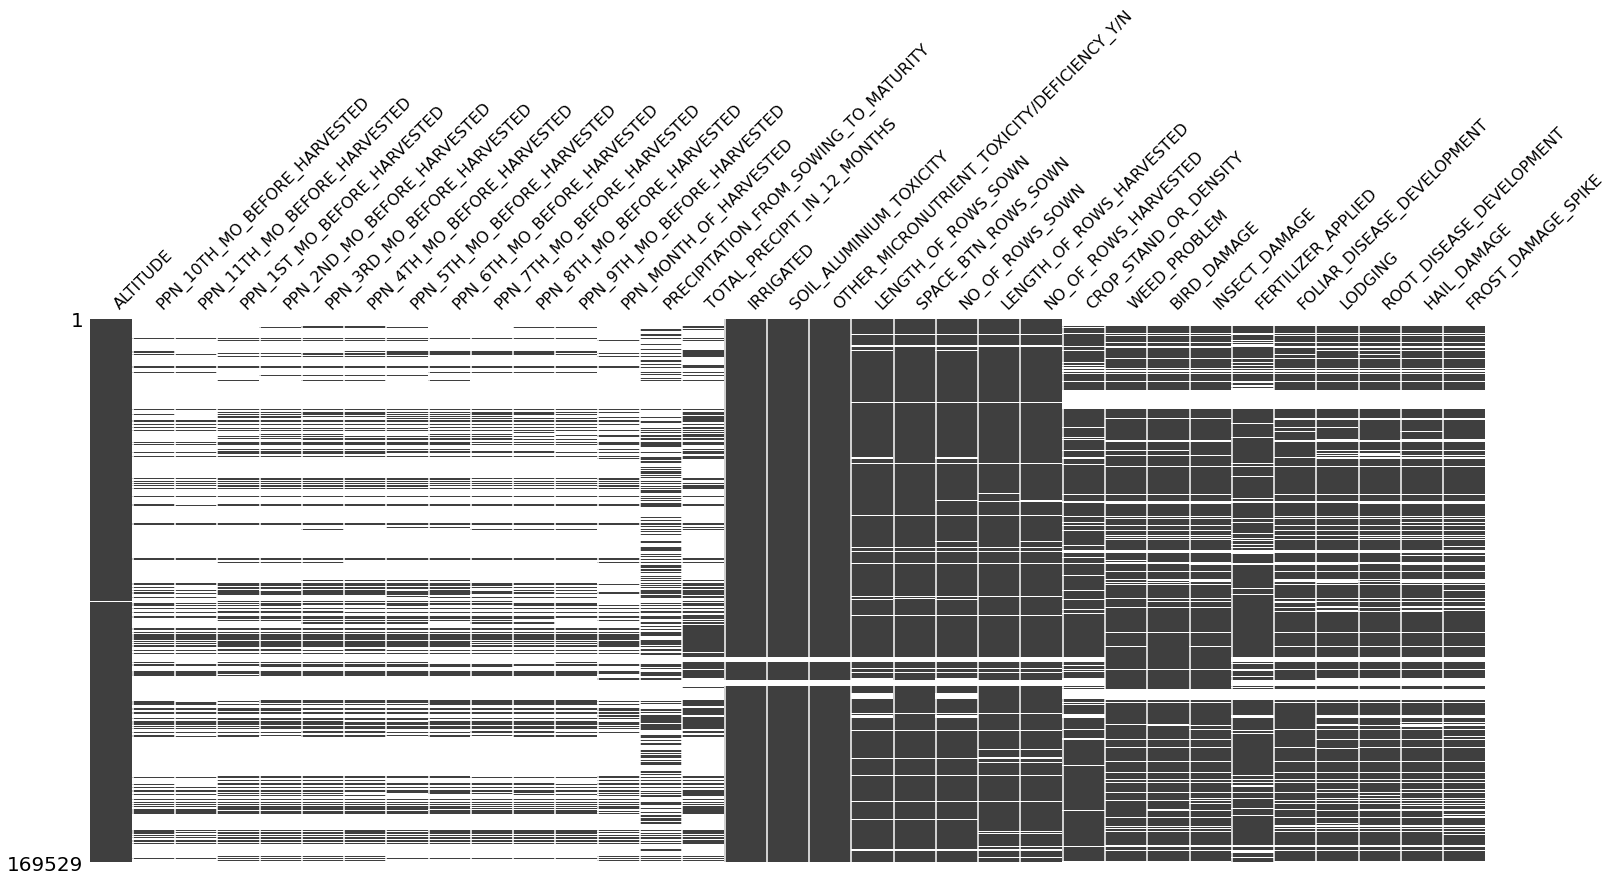

In [0]:
import missingno
# https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
# missing data plot, where white is missing
missingno.matrix(W, sparkline=False)

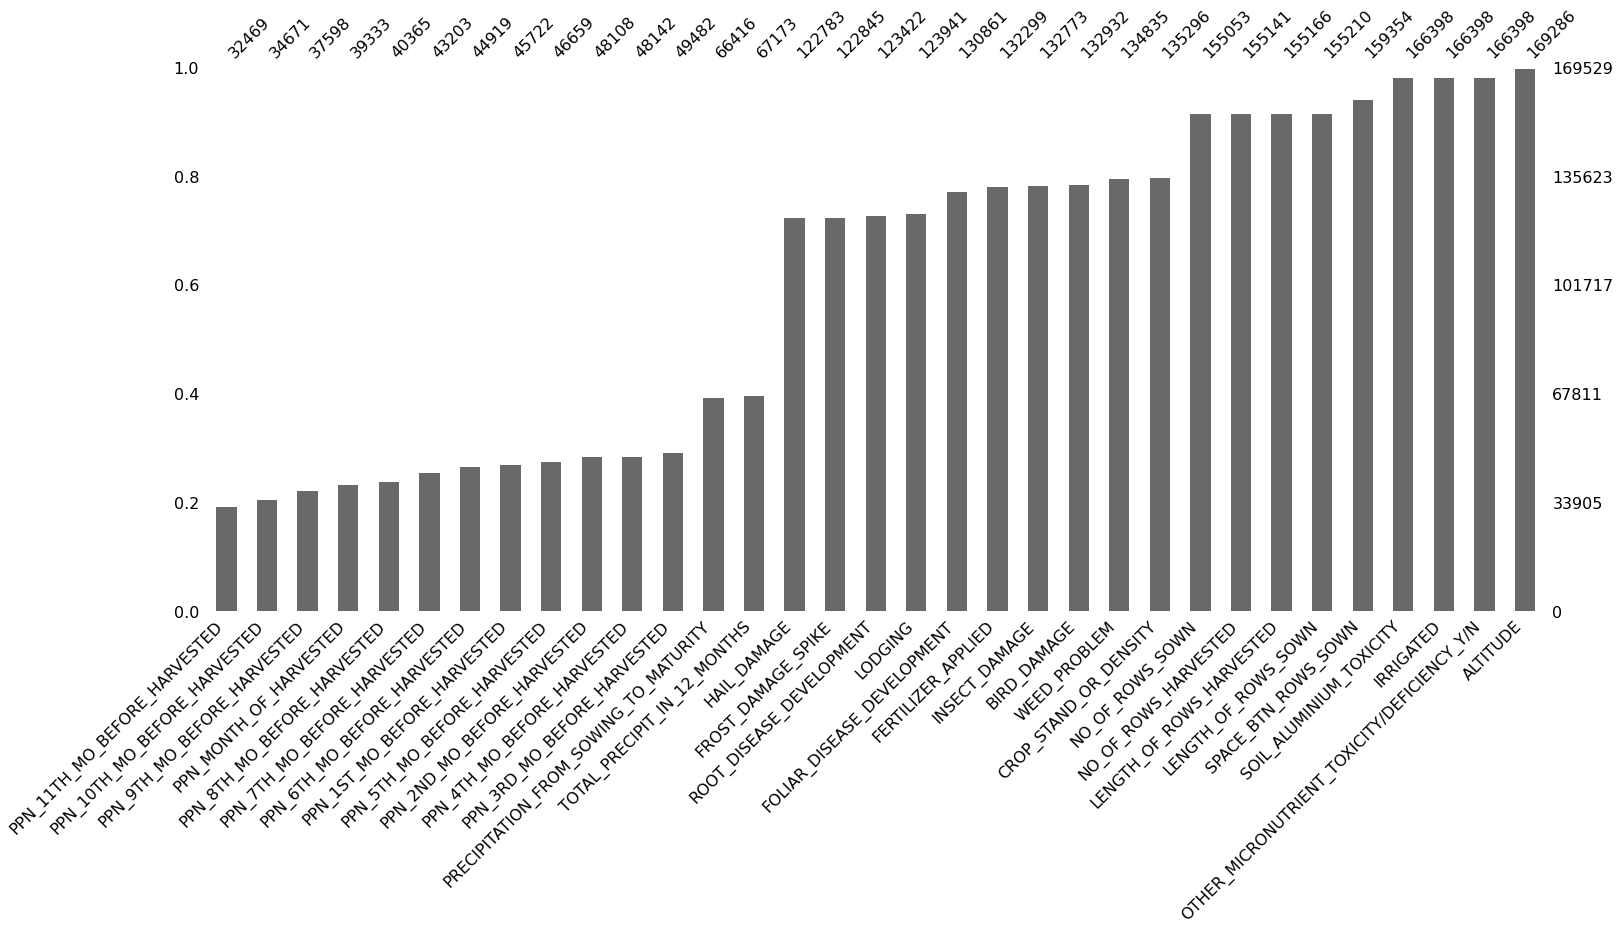

In [0]:
missingno.bar(W, sort='ascending')

In [0]:
W.to_pickle('W_pre_impute.pkl')

## Imputation of Remaining Missing Data

In [0]:
# Random Forest MissForest Imputation with MissingPy
# https://pypi.org/project/missingpy/

!pip install missingpy

     |████████████████████████████████| 51kB 2.6MB/s 


In [0]:
#W = pd.read_csv('W_pre_impute.csv', index_col=0)
W[W_factors] = W[W_factors].astype('category')
W.dtypes

ALTITUDE                                        float64
PPN_10TH_MO_BEFORE_HARVESTED                    float64
PPN_11TH_MO_BEFORE_HARVESTED                    float64
PPN_1ST_MO_BEFORE_HARVESTED                     float64
PPN_2ND_MO_BEFORE_HARVESTED                     float64
PPN_3RD_MO_BEFORE_HARVESTED                     float64
PPN_4TH_MO_BEFORE_HARVESTED                     float64
PPN_5TH_MO_BEFORE_HARVESTED                     float64
PPN_6TH_MO_BEFORE_HARVESTED                     float64
PPN_7TH_MO_BEFORE_HARVESTED                     float64
PPN_8TH_MO_BEFORE_HARVESTED                     float64
PPN_9TH_MO_BEFORE_HARVESTED                     float64
PPN_MONTH_OF_HARVESTED                          float64
PRECIPITATION_FROM_SOWING_TO_MATURITY           float64
TOTAL_PRECIPIT_IN_12_MONTHS                     float64
IRRIGATED                                      category
SOIL_ALUMINIUM_TOXICITY                        category
OTHER_MICRONUTRIENT_TOXICITY/DEFICIENCY_Y/N    c

In [0]:
for col in W_factors :
  W[col] = W[col].str.upper()

In [0]:
W_dummies = pd.get_dummies(W[W_factors]) # Create dummy variables for each categorical variable
W = pd.concat([W[W_numeric],W_dummies],axis=1,) # Concatenate dummy variables onto dataframe of numeric variables
W.head()

,ALTITUDE,PPN_10TH_MO_BEFORE_HARVESTED,PPN_11TH_MO_BEFORE_HARVESTED,PPN_1ST_MO_BEFORE_HARVESTED,PPN_2ND_MO_BEFORE_HARVESTED,PPN_3RD_MO_BEFORE_HARVESTED,PPN_4TH_MO_BEFORE_HARVESTED,PPN_5TH_MO_BEFORE_HARVESTED,PPN_6TH_MO_BEFORE_HARVESTED,PPN_7TH_MO_BEFORE_HARVESTED,PPN_8TH_MO_BEFORE_HARVESTED,PPN_9TH_MO_BEFORE_HARVESTED,PPN_MONTH_OF_HARVESTED,PRECIPITATION_FROM_SOWING_TO_MATURITY,TOTAL_PRECIPIT_IN_12_MONTHS,LENGTH_OF_ROWS_SOWN,SPACE_BTN_ROWS_SOWN,NO_OF_ROWS_SOWN,LENGTH_OF_ROWS_HARVESTED,NO_OF_ROWS_HARVESTED,IRRIGATED_NO,IRRIGATED_YES,SOIL_ALUMINIUM_TOXICITY_NO,SOIL_ALUMINIUM_TOXICITY_YES,OTHER_MICRONUTRIENT_TOXICITY/DEFICIENCY_Y/N_NO,OTHER_MICRONUTRIENT_TOXICITY/DEFICIENCY_Y/N_YES,BIRD_DAMAGE_MODERATE,BIRD_DAMAGE_NONE,BIRD_DAMAGE_SEVERE,BIRD_DAMAGE_SLIGHT,BIRD_DAMAGE_TRACES,CROP_STAND_OR_DENSITY_DENSE,CROP_STAND_OR_DENSITY_NORMAL,CROP_STAND_OR_DENSITY_SPARSE,WEED_PROBLEM_MODERATE,WEED_PROBLEM_NONE,WEED_PROBLEM_SEVERE,WEED_PROBLEM_SLIGHT,WEED_PROBLEM_TRACES,INSECT_DAMAGE_MODERATE,INSECT_DAMAGE_NONE,INSECT_DAMAGE_SEVERE,INSECT_DAMAGE_SLIGHT,INSECT_DAMAGE_TRACES,FERTILIZER_APPLIED_NO,FERTILIZER_APPLIED_YES,FOLIAR_DISEASE_DEVELOPMENT_MODERATE,FOLIAR_DISEASE_DEVELOPMENT_NONE,FOLIAR_DISEASE_DEVELOPMENT_SEVERE,FOLIAR_DISEASE_DEVELOPMENT_SLIGHT,FOLIAR_DISEASE_DEVELOPMENT_TRACES,LODGING_MODERATE,LODGING_NONE,LODGING_SEVERE,LODGING_SLIGHT,LODGING_TRACES,ROOT_DISEASE_DEVELOPMENT_MODERATE,ROOT_DISEASE_DEVELOPMENT_NONE,ROOT_DISEASE_DEVELOPMENT_SEVERE,ROOT_DISEASE_DEVELOPMENT_SLIGHT,ROOT_DISEASE_DEVELOPMENT_TRACES,HAIL_DAMAGE_MODERATE,HAIL_DAMAGE_NONE,HAIL_DAMAGE_SEVERE,HAIL_DAMAGE_SLIGHT,HAIL_DAMAGE_TRACES,FROST_DAMAGE_SPIKE_MODERATE,FROST_DAMAGE_SPIKE_NONE,FROST_DAMAGE_SPIKE_SEVERE,FROST_DAMAGE_SPIKE_SLIGHT,FROST_DAMAGE_SPIKE_TRACES
Unique_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4ESWYT_19105_254741_5,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,20.0,4.0,3.5,4.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4ESWYT_19207_254741_5,415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,30.0,4.0,2.5,4.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4ESWYT_19402_254741_5,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,25.0,4.0,2.5,4.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4ESWYT_11101_254741_5,1448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,25.0,4.0,2.0,4.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4ESWYT_22001_254741_5,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,20.0,4.0,2.5,4.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
W_dummy_col_num = [W.columns.get_loc(c) for c in W_dummies.columns if c in W]

In [0]:
W.shape

(169529, 71)

In [0]:
# https://pypi.org/project/missingpy/
from missingpy import MissForest

imputer = MissForest()
W_imp = imputer.fit_transform(W,cat_vars=W_dummy_col_num)

/usr/local/lib/python3.6/dist-packages/missingpy/missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 0


In [0]:
W_imp = pd.DataFrame(W_imp, columns=W.columns)
W_imp.index = W.index
W_imp.head()

In [0]:
W_imp.to_pickle('W_imp.pkl')

## Basic Visualizations

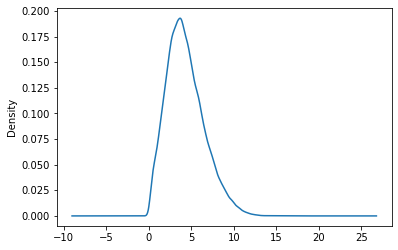

In [0]:
data['YLD_NM'] = pd.to_numeric(data['GRAIN_YIELD'], errors='coerce')
data['YLD_NM'].plot.kde()

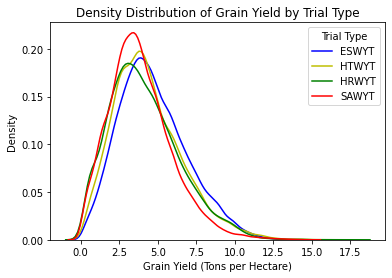

In [0]:
# https://python-graph-gallery.com/74-density-plot-of-several-variables/
# https://stackoverflow.com/questions/45201514/edit-seaborn-legend

# plot of 2 variables
p1=sns.kdeplot(data[data['TRIAL_TYPE']=='ESWYT']['YLD_NM'], shade=False, color="b")
p1=sns.kdeplot(data[data['TRIAL_TYPE']=='HTWYT']['YLD_NM'], shade=False, color="y")
p1=sns.kdeplot(data[data['TRIAL_TYPE']=='HRWYT']['YLD_NM'], shade=False, color="g")
p1=sns.kdeplot(data[data['TRIAL_TYPE']=='SAWYT']['YLD_NM'], shade=False, color="r")


plt.legend(title='Trial Type', loc='upper right', labels=['ESWYT','HTWYT',  'HRWYT','SAWYT'])
p1.set_xlabel('Grain Yield (Tons per Hectare)')
p1.set_ylabel('Density')
p1.set_title('Density Distribution of Grain Yield by Trial Type')
plt.show(p1)

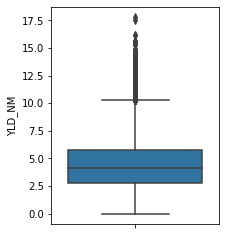

In [0]:
fig_dims = (3, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y = data['YLD_NM'], ax = ax)

Text(0.5, 1.0, 'Grain Yield by Trial Type')

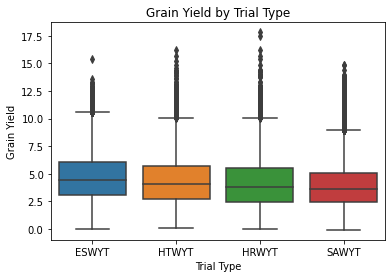

In [0]:

ax = sns.boxplot(x = 'TRIAL_TYPE', y = 'YLD_NM', data = data)
ax.set_ylabel('Grain Yield')
ax.set_xlabel('Trial Type')
ax.set_title('Grain Yield by Trial Type')

Text(0.5, 1.0, 'Scatterplot of Grain Yield and Altitude')

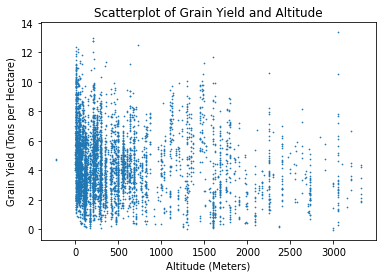

In [0]:
# https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/

# Sample 5000 random lines
df_sample=data.sample(5000)
 
# Make the plot with this subset
plt.plot( 'ALTITUDE', 'YLD_NM', data=df_sample, linestyle='', marker='o', markersize=0.7)
 
# titles
plt.xlabel('Altitude (Meters)')
plt.ylabel('Grain Yield (Tons per Hectare)')
plt.title('Scatterplot of Grain Yield and Altitude', loc='center')
